In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('processed_data/first_pass.csv')

In [11]:
data[data["RunID"] == 10018226548]

,RunID,Time,Latitude,Longitude,Elevation,Distance,HeartRate,Cadence,Speed
0,10018226548,2023-06-26 18:22:43.350000,52.225510,4.504773,-1.981,283.399994,73,86.0,NaN
1,10018226548,2023-06-26 18:22:44.350000,52.225522,4.504797,-1.829,286.200012,73,87.0,NaN
2,10018226548,2023-06-26 18:22:45.350000,52.225538,4.504827,-1.676,288.500000,73,87.0,NaN
3,10018226548,2023-06-26 18:22:46.350000,52.225558,4.504863,-1.524,290.799988,74,86.0,NaN
4,10018226548,2023-06-26 18:22:47.350000,52.225573,4.504897,-1.372,293.100006,75,86.0,NaN
...,...,...,...,...,...,...,...,...,...
1523,10018226548,2023-06-26 18:53:47.350000,52.224865,4.500942,1.372,5015.600098,140,85.0,NaN
1524,10018226548,2023-06-26 18:53:48.350000,52.224855,4.500955,1.372,5017.399902,140,85.0,NaN
1525,10018226548,2023-06-26 18:53:49.350000,52.224848,4.500970,1.372,5019.200195,140,85.0,NaN
1526,10018226548,2023-06-26 18:53:50.350000,52.224843,4.500985,1.372,5021.200195,141,85.0,NaN


In [12]:
data['Speed'].unique()

array([       nan, 1.10000002, 1.5180554 , ..., 2.15      , 2.65      ,
       1.45      ])

## Export small sample

In [ ]:
sample = data['RunID'].unique()[1:11].tolist()
sample

In [ ]:
df_sample = data[data["RunID"].isin(sample)]
df_sample

In [ ]:
df_sample.to_csv('sample.csv', index=False)  

## EDA

In [3]:
data

,RunID,Time,Latitude,Longitude,Elevation,Distance,HeartRate,Cadence,Speed
0,10018226548,2023-06-26T18:22:43.350000,52.225510,4.504773,-1.981,283.399994,73,86.0,NaN
1,10018226548,2023-06-26T18:22:44.350000,52.225522,4.504797,-1.829,286.200012,73,87.0,NaN
2,10018226548,2023-06-26T18:22:45.350000,52.225538,4.504827,-1.676,288.500000,73,87.0,NaN
3,10018226548,2023-06-26T18:22:46.350000,52.225558,4.504863,-1.524,290.799988,74,86.0,NaN
4,10018226548,2023-06-26T18:22:47.350000,52.225573,4.504897,-1.372,293.100006,75,86.0,NaN
...,...,...,...,...,...,...,...,...,...
1678681,9893577317,2023-06-07T18:42:49.693000,52.224350,4.501980,1.067,6122.700195,144,86.0,NaN
1678682,9893577317,2023-06-07T18:42:50.693000,52.224357,4.501937,1.067,6125.799805,144,86.0,NaN
1678683,9893577317,2023-06-07T18:42:51.693000,52.224362,4.501897,0.914,6128.700195,143,85.0,NaN
1678684,9893577317,2023-06-07T18:42:52.693000,52.224365,4.501860,0.914,6131.600098,143,83.0,NaN


## Descriptive

In [4]:
descriptive_stats = data.describe()

In [5]:
descriptive_stats[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']]

,Elevation,Distance,HeartRate,Cadence,Speed
count,1.635325e+06,1.627379e+06,1.678686e+06,1.640012e+06,73353.000000
mean,5.790992e+00,5.680972e+03,1.413229e+02,7.848103e+01,2.574947
std,7.199798e+01,4.327718e+03,2.399560e+01,2.362458e+01,0.866108
min,-1.696230e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,-3.505000e+00,2.516300e+03,1.330000e+02,8.500000e+01,2.500000
50%,1.520000e-01,4.865300e+03,1.450000e+02,8.700000e+01,2.800000
75%,5.182000e+00,8.101900e+03,1.550000e+02,8.900000e+01,3.000000
max,1.310199e+03,4.328620e+04,2.350000e+02,1.240000e+02,9.500000


In [13]:
# Missing values
data.isna().sum()

RunID              0
Time               0
Latitude        9169
Longitude       9169
Elevation      43361
Distance       51307
HeartRate          0
Cadence        38674
Speed        1605333
dtype: int64

## Time-series Analysis

In [20]:
# convert to datetime
data['Time'] = pd.to_datetime(data['Time'], errors = 'coerce', utc=True)

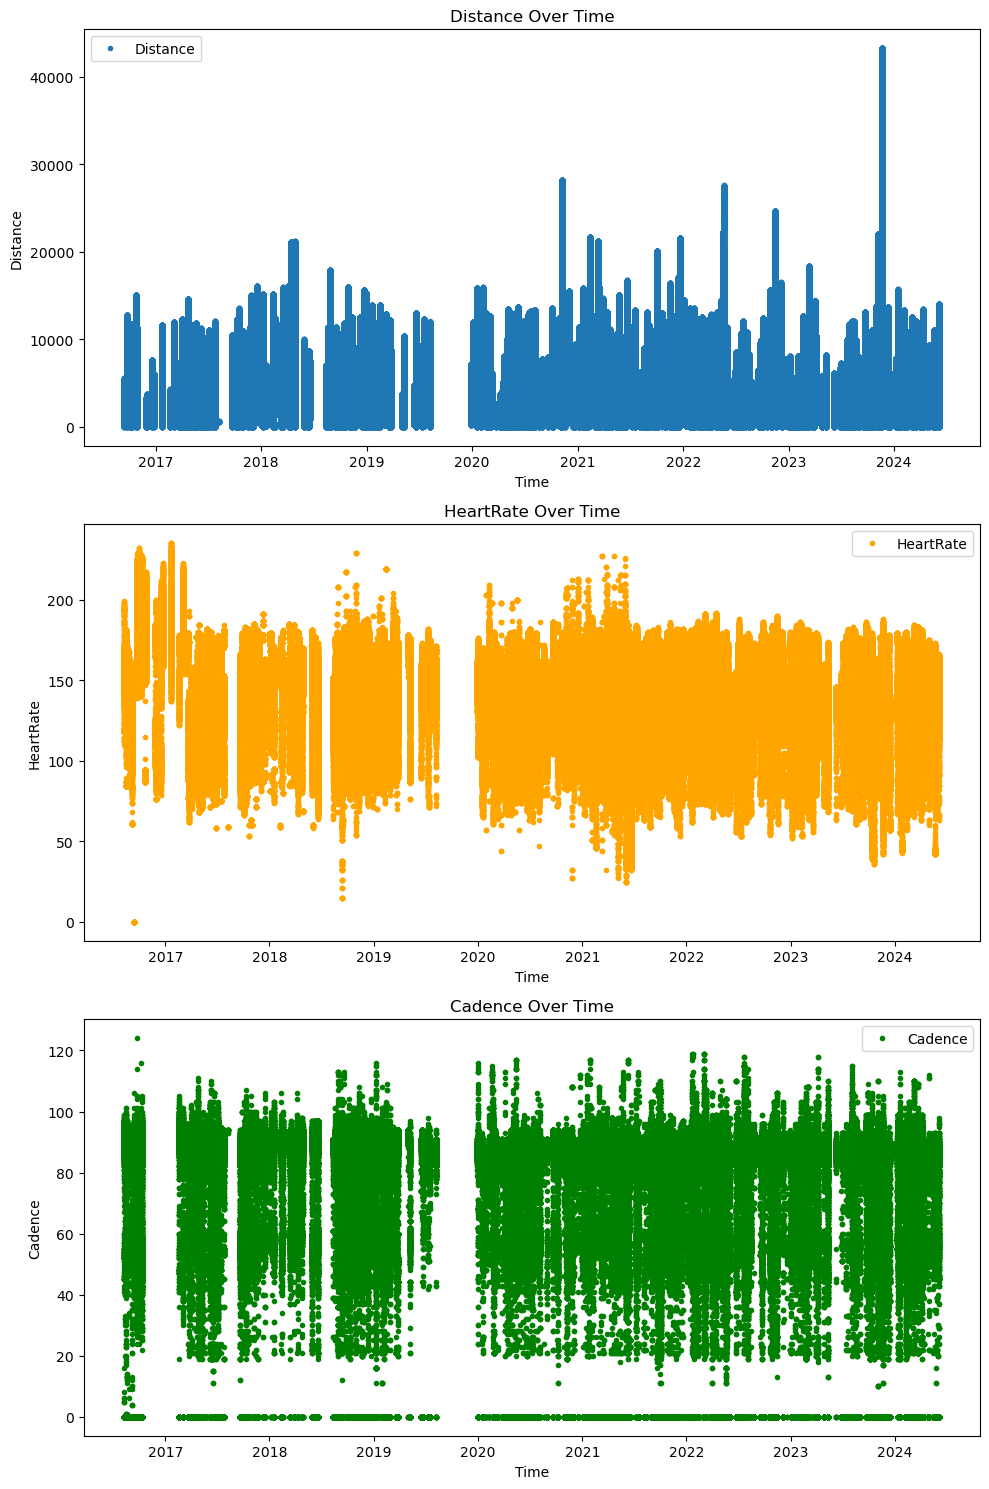

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# distance over time
ax[0].plot(data['Time'], data['Distance'], '.', label = 'Distance')
ax[0].set_title('Distance Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Distance')

# heartRate over time
ax[1].plot(data['Time'], data['HeartRate'], '.', label = 'HeartRate', color = 'orange')
ax[1].set_title('HeartRate Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('HeartRate')

# cadence over time
ax[2].plot(data['Time'], data['Cadence'], '.', label = 'Cadence', color = 'green')
ax[2].set_title('Cadence Over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Cadence')

plt.tight_layout()
plt.show()

## Frequency Analysis

C:\Users\Jason\AppData\Local\Temp\ipykernel_4932\3613998802.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['Time'].dt.to_period('M')


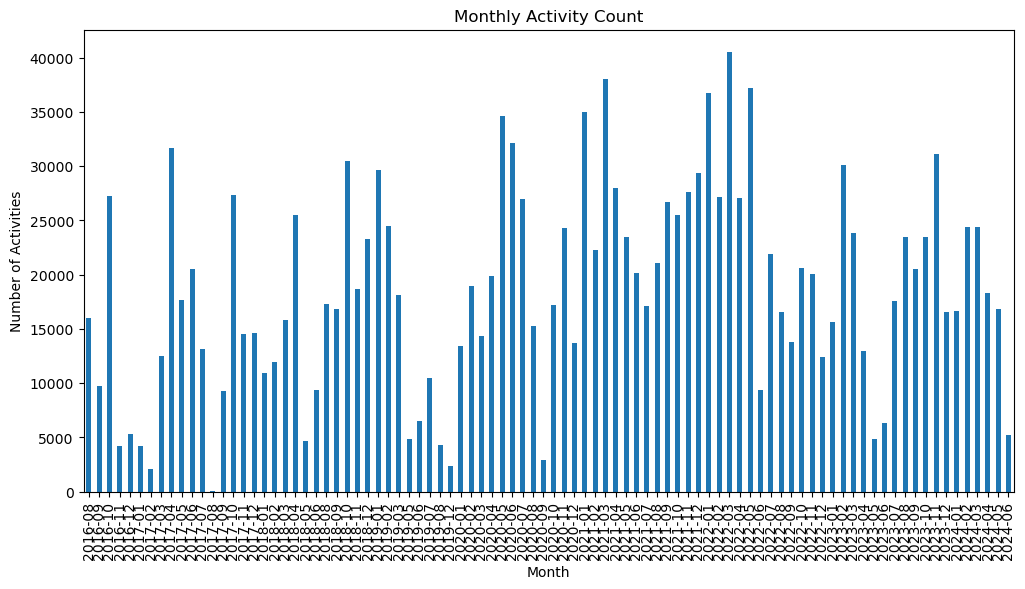

In [25]:
# Extract the date part for categorical analysis
data['Date'] = data['Time'].dt.date

# Extract year and month for grouping
data['YearMonth'] = data['Time'].dt.to_period('M')

# Extract the day of the week for grouping
data['Weekday'] = data['Time'].dt.day_name()

# Group by year and month and count activities
monthly_activity_count = data.groupby('YearMonth').size()

# Group by weekday and count activities
weekday_activity_count = data.groupby('Weekday').size()

# Plot monthly activity count
plt.figure(figsize=(12, 6))
monthly_activity_count.plot(kind='bar')
plt.title('Monthly Activity Count')
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.show()

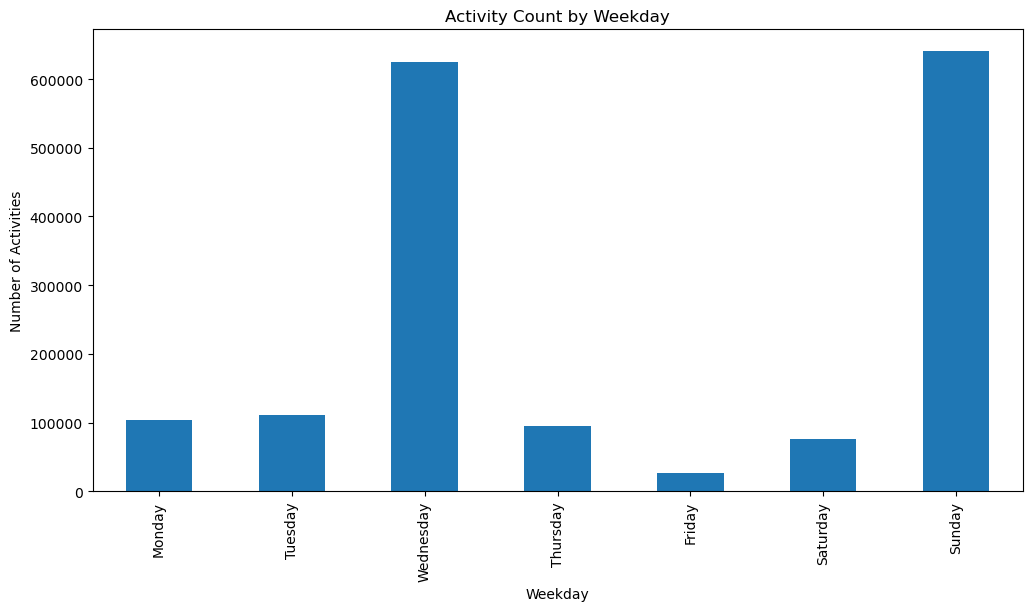

In [26]:
# To ensure the order is Monday to Sunday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity_count = weekday_activity_count.reindex(weekday_order)

# Plot weekday activity count
plt.figure(figsize=(12, 6))
weekday_activity_count.plot(kind='bar')
plt.title('Activity Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Activities')
plt.show()

## Correlation Heatmap

TODO: Perform Haversine formula on NaN values in column `speed` to limit dropped rows.

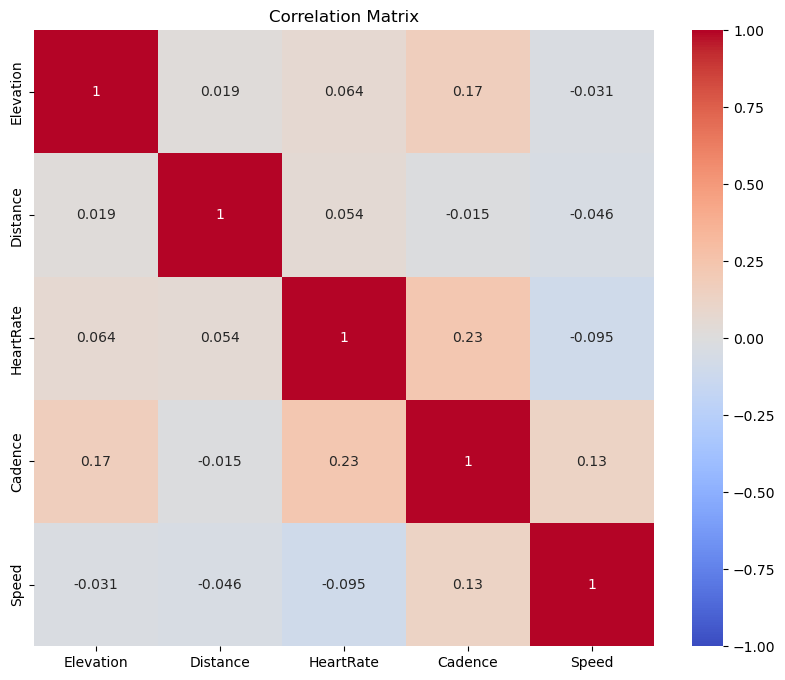

In [16]:
# Drop rows with NaN values for correlation analysis
corr_data = data[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']].dropna()
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Checking outliers

Outliers defined by Z-score > 3

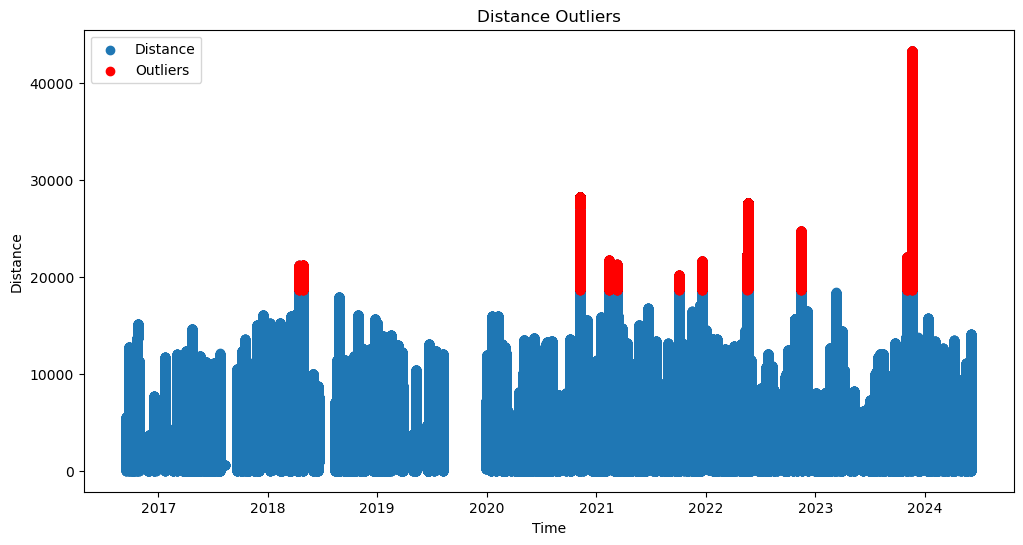

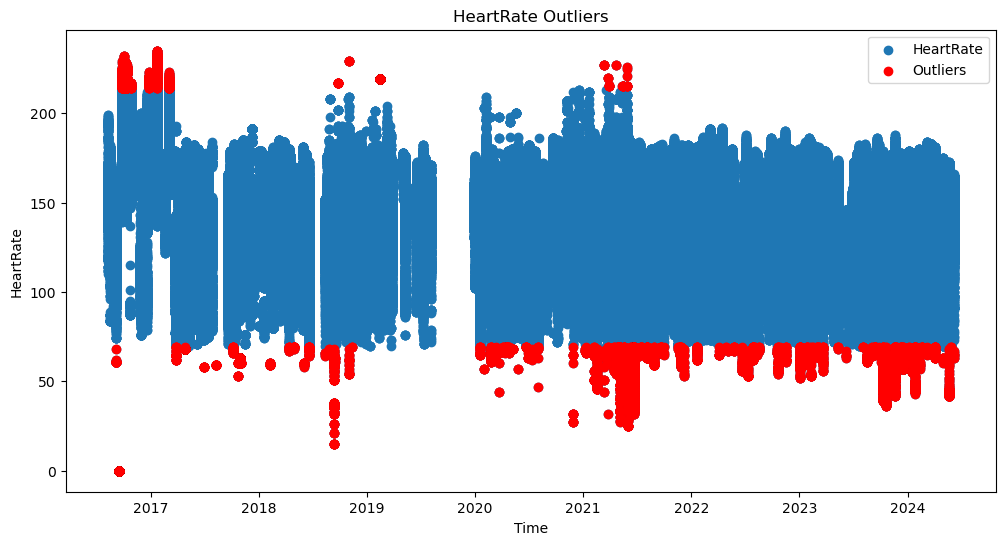

In [17]:
import numpy as np

# Identify outliers in 'Distance'
distance_outliers = data[np.abs(data['Distance'] - data['Distance'].mean()) > (3 * data['Distance'].std())]

# Identify outliers in 'HeartRate'
heartrate_outliers = data[np.abs(data['HeartRate'] - data['HeartRate'].mean()) > (3 * data['HeartRate'].std())]

# Plot Distance outliers
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['Distance'], label='Distance')
plt.scatter(distance_outliers['Time'], distance_outliers['Distance'], color='red', label='Outliers')
plt.title('Distance Outliers')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.show()

# Plot HeartRate outliers
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['HeartRate'], label='HeartRate')
plt.scatter(heartrate_outliers['Time'], heartrate_outliers['HeartRate'], color='red', label='Outliers')
plt.title('HeartRate Outliers')
plt.xlabel('Time')
plt.ylabel('HeartRate')
plt.legend()
plt.show()

In [ ]:
distance_outliers['Distance'].unique()

In [ ]:
heartrate_outliers['HeartRate'].unique()